In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

testare questo codice con la forza nonlineare e con le medie di ensemble

In [2]:
# coefficienti yoshida
denominatore = 2-2**(1/3)

w_0 = -(2**(1/3))/denominatore
w_1 = 1/denominatore

c_1 = w_1/2
c_2 = (w_0 + w_1)/2
c_3 = c_2
c_4 = c_1

d_1 = w_1
d_2 = w_0
d_3 = w_1

In [3]:
# parametri simulazione
h = 0.01

In [4]:
# parametri fisici oscillatore
m = 1.
omega = 1.
#k_B = 1.38065156*10**(-23)
k_B = 1.
T = 20
beta = 1/(k_B*T)

In [5]:
def forza(q):
    return -m*(omega**2)*q

In [6]:
def yoshida_4(q, p):

    q_temp_1 = q + c_1*p/m*h
    p_temp_1 = p + d_1*forza(q_temp_1)*h

    q_temp_2 = q_temp_1 + c_2*p_temp_1/m*h
    p_temp_2 = p_temp_1 + d_2*forza(q_temp_2)*h

    q_temp_3 = q_temp_2 + c_3*p_temp_2/m*h
    p_temp_3 = p_temp_2 + d_3*forza(q_temp_3)/m*h

    q_evoluto = q_temp_3 + c_4*p_temp_3/m*h
    p_evoluto = p_temp_3

    return q_evoluto, p_evoluto

In [14]:
N = 1000

In [15]:
q_evoluzione = np.zeros(N)
p_evoluzione = np.zeros(N)

q_0 = np.random.uniform()
p_0 = np.random.uniform()

q_evoluzione[0] = q_0
p_evoluzione[0] = p_0

In [16]:
 for i in range(0, N-1):
        q_evoluzione[i+1], p_evoluzione[i+1] = yoshida_4(q_evoluzione[i], p_evoluzione[i])
         

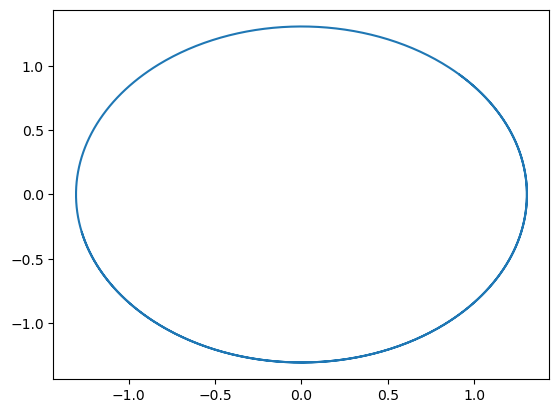

In [17]:
plt.plot(q_evoluzione, p_evoluzione)

(0.0, 4.0)

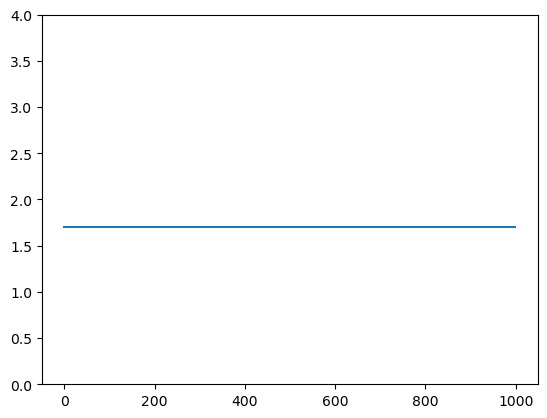

In [22]:
plt.plot(p_evoluzione**2 + q_evoluzione**2)
plt.ylim([0,4])